In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
dirs = ['/hpc/compgen/projects/nanoxog/raw/benchmark/teng_benchmark',
        '/hpc/compgen/projects/nanoxog/raw/benchmark/jain_benchmark',
        '/hpc/compgen/projects/nanoxog/raw/benchmark/wick_benchmark']

In [4]:
df_list = list()
for d in dirs:
    for dd in os.listdir(d):
        rep_file = os.path.join(d, dd, 'segmentation_report.txt')
        if os.path.isfile(rep_file):
            df = pd.read_csv(rep_file, sep = '\t', header = None)
            df['species'] = dd
            df = df.rename(columns={0:'file', 1:'read_id', 2:'segmentation_result', 3:'align_st', 4:'align_nd', 5:'align_strand', 6:'align_chrom'})
            df_list.append(df)
        else:
            print(dd)

genomes
genomes
basecalls_test
genomes_test
genomes


In [5]:
df_segmentation = pd.concat(df_list)

In [6]:
np.sum(df_segmentation['segmentation_result'] == 'Success')

463891

In [7]:
463891/len(df_segmentation)

0.7958697692293175

In [11]:
len(df_segmentation)

567718

In [8]:
counts_dict = {'species': list(), 'outcome': list(), 'counts': list()}
for spe in np.unique(df_segmentation['species']):
    temp_df = df_segmentation[df_segmentation['species'] == spe]
    counts_dict['species'].append(spe)
    counts_dict['species'].append(spe)
    counts_dict['outcome'].append('success')
    counts_dict['outcome'].append('fail')
    counts_dict['counts'].append(np.sum(temp_df['segmentation_result'] == 'Success'))
    counts_dict['counts'].append(np.sum(temp_df['segmentation_result'] != 'Success'))
    

In [9]:
df = pd.DataFrame(counts_dict)

[]

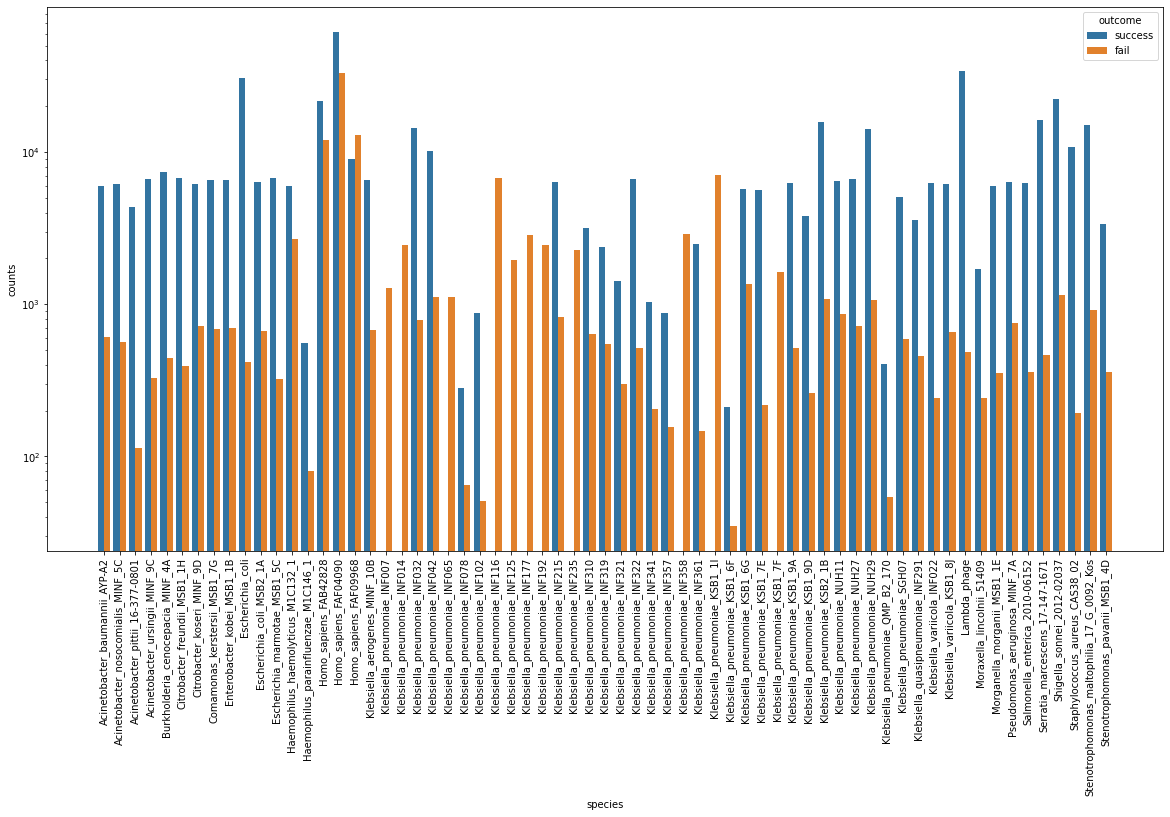

In [10]:
plt.figure(figsize=(20, 10))
sns.barplot(x = 'species', y = 'counts', hue = 'outcome', data = df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.plot()